In [30]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

In [31]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, parser=tweepy.parsers.JSONParser())

In [32]:
# Target Search Term
target_terms = ("@CNN", "@FoxNews", "@nytimes", "@BBC")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [33]:
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in target_terms:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
                # All data is grabbed from the JSON returned by Twitter
                tweet_data["tweet_source"].append(tweet["user"]["name"])
                tweet_data["tweet_text"].append(tweet["text"])
                tweet_data["tweet_date"].append(tweet["created_at"])

                # Run sentiment analysis on each tweet using Vader
                tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
                tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
                tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
                tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [34]:
# Store the final contents into a DataFrame
news_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
news_df.to_csv("news_sentiment", encoding="utf-8")

# Visualize the DataFrame
news_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,CNN,As a prosecutor seeks to revoke Bill Cosby's $...,Thu Apr 26 19:57:13 +0000 2018,0.3818,0.140,0.860,0.000
1,CNN,"Cosby accuser Andrea Constand ""needs to be her...",Thu Apr 26 19:48:46 +0000 2018,0.0000,0.000,1.000,0.000
2,CNN,"RT @CNNnewsroom: ""I'm stunned ... I'm elated f...",Thu Apr 26 19:45:17 +0000 2018,0.2500,0.143,0.714,0.143
3,CNN,Immediately after learning that Bill Cosby was...,Thu Apr 26 19:39:17 +0000 2018,-0.5859,0.124,0.600,0.276
4,CNN,"""Money and power, or who you are, will not sto...",Thu Apr 26 19:25:28 +0000 2018,-0.3637,0.081,0.773,0.146


In [35]:
news_df.count()

tweet_source         400
tweet_text           400
tweet_date           400
tweet_vader_score    400
tweet_pos_score      400
tweet_neu_score      400
tweet_neg_score      400
dtype: int64

## Sentimenet Scatter Plot

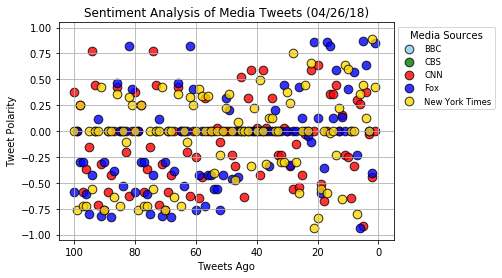

In [36]:
plt.scatter(np.arange(-len(news_df[news_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            news_df[news_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(news_df[news_df["tweet_source"] == "CBS News"]), 0, 1), 
            news_df[news_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(news_df[news_df["tweet_source"] == "CNN"]), 0, 1), 
            news_df[news_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(news_df[news_df["tweet_source"] == "Fox News"]), 0, 1), 
            news_df[news_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(news_df[news_df["tweet_source"] == "The New York Times"]), 0, 1), 
            news_df[news_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("News Sentiment Analysis", bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()